In [118]:
import nltk
from konlpy.tag import Hannanum
import pandas as pd
from time import sleep
import datetime 

In [2]:
import pandas as pd
import numpy as np
import platform

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

%matplotlib inline



In [16]:
# df = pd.read_csv('./work_nouns_stop.csv',encoding='UTF-8')
# df.set_index('단어',inplace = True)
# del df["Unnamed: 0"] 

df

,빈도
단어,
정책,347
최저임금,344
국민,311
창출,301
반대,266
공무원,263
청년,232
경제,214
대통령,211


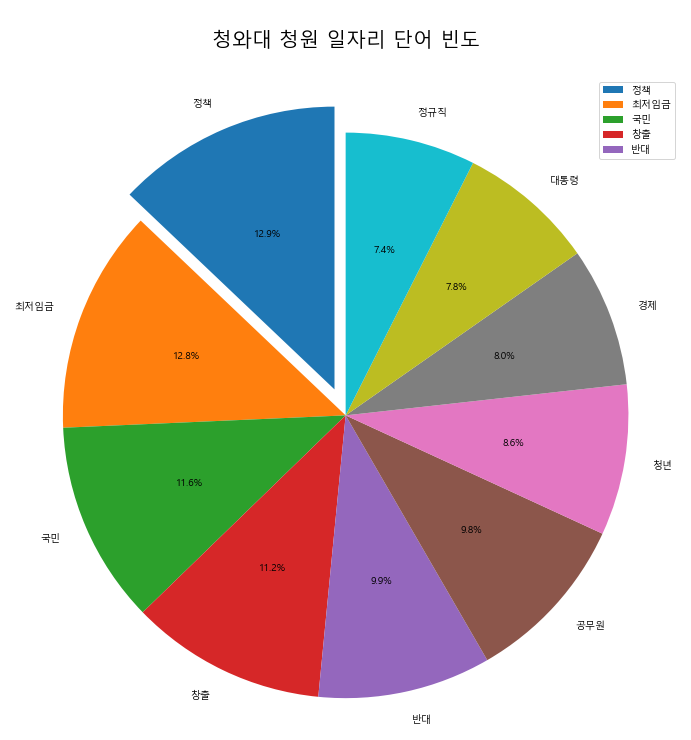

In [19]:
df_blue_job = df[0:10]
df_blue_job

plt.figure(figsize=(12,12))

df_num1 = df_blue_job['빈도']

# len(df_num)
explode = [0.1 if df_num1[i] == df_num1.max() else 0 for i in range(len(df_num1))]

plt.pie(df_num1,
        explode = explode,
        labels = df_num1.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)

plt.axis('equal')
plt.legend(df_blue_job.index[:5], loc = 1)
plt.title("\n청와대 청원 일자리 단어 빈도\n", fontsize = 20)
plt.show()



In [20]:
df2 = pd.read_csv('jobcommon.csv',encoding='EUC-KR')
df2.rename(columns={"키워드":"단어"}, inplace = True)
df2.set_index('단어',inplace = True)
# del df2["Unnamed: 0"] 
  
df_han_job=df2[0:10]
# type(df_han_job)
df_han_job

,Unnamed: 0,빈도
단어,,
대통령,0,103
고용,1,87
최저임금,2,82
경제,3,77
청년,4,75
사회,5,73
지원,6,61
기업,7,53
트럼프,8,53


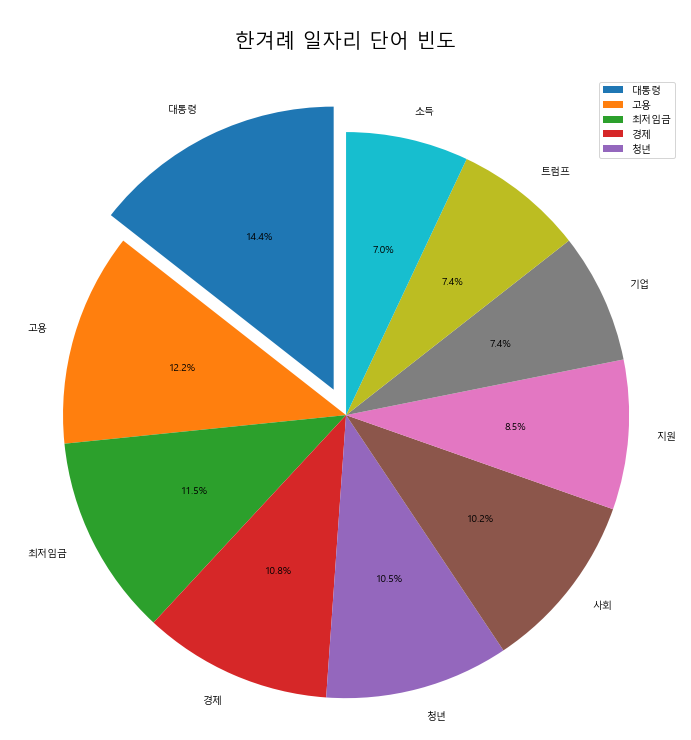

In [21]:
plt.figure(figsize=(12,12))

df_num = df_han_job['빈도']

# len(df_num)
explode = [0.1 if df_num[i] == df_num.max() else 0 for i in range(len(df_num))]

plt.pie(df_num,
        explode = explode,
        labels = df_han_job.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)
plt.axis('equal')
plt.legend(df_han_job.index[:5], loc = 1)
plt.title("\n한겨례 일자리 단어 빈도\n", fontsize = 20)
plt.show()
        

In [24]:
df3 = pd.read_csv('./cho_emp.csv',encoding='EUC-KR')
df3 = df3.drop(["Unnamed: 0"],1)
df3.columns = ['단어','빈도']
df3.set_index('단어',inplace=True)
df3 = df3[0:10]
# df3.index
df3

,빈도
단어,
4차,40
산업혁명,34
기업,29
개최,18
세계,17
일자리,17
글로벌,16
대학,16
혁신,15


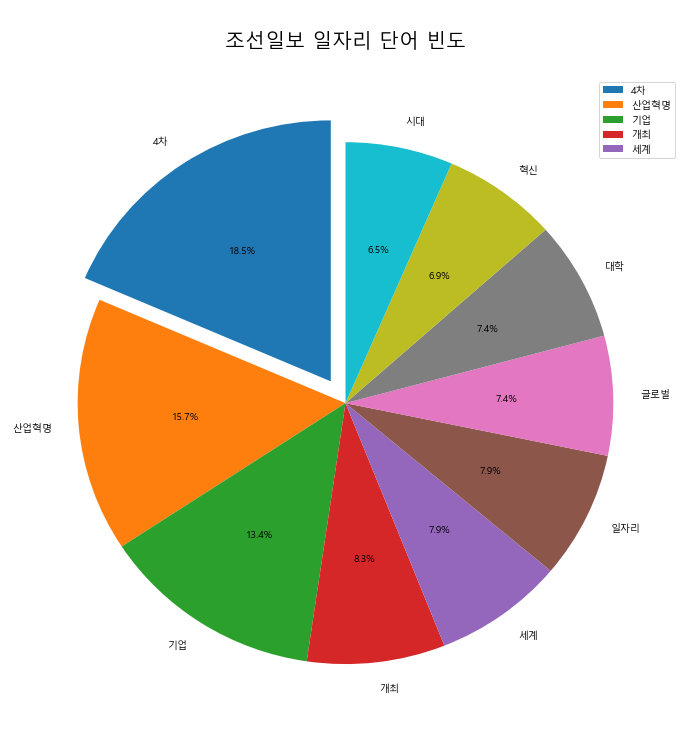

In [25]:
plt.figure(figsize=(12,12))

df_num3 = df3['빈도']

explode = [0.1 if df_num3[i] == df_num3.max() else 0 for i in range(len(df_num3))]

plt.pie(df_num3,
        explode = explode,
        labels=df_num3.index, 
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)

plt.legend(df_num3.index[:5],loc = 1)
plt.title("\n조선일보 일자리 단어 빈도\n", fontsize= 20)
plt.show()

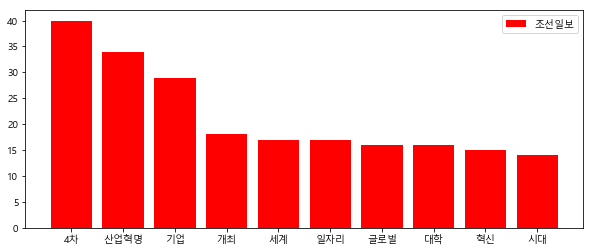

In [26]:
# 조선일보 일자리 빈도 
plt.figure(figsize=(10,4))
plt.bar(df3.index,df3['빈도'],label="조선일보",color = 'r')
plt.legend()

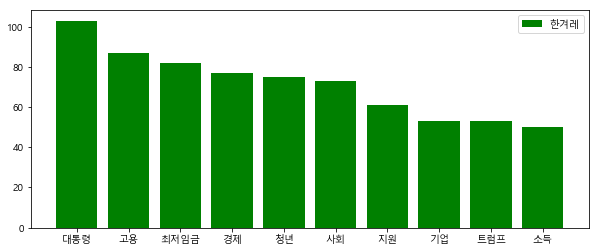

In [27]:
# 한겨레 일자리 단어 빈도 
plt.figure(figsize=(10,4))
plt.bar(df_han_job.index,df_han_job['빈도'],label = '한겨레',color='g')
plt.legend()

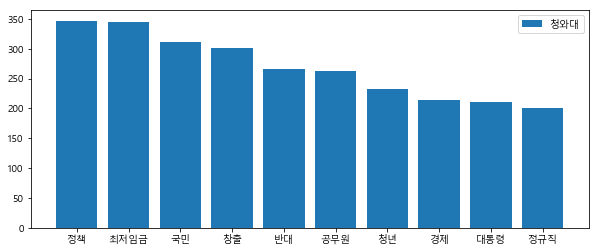

In [28]:
# 청와대 일자리 단어 빈도 
plt.figure(figsize=(10,4))
plt.bar(df_blue_job.index,df_blue_job['빈도'],label="청와대")
plt.legend()

Text(0.5,1,'\n조선일보 일자리 단어 빈도\n')

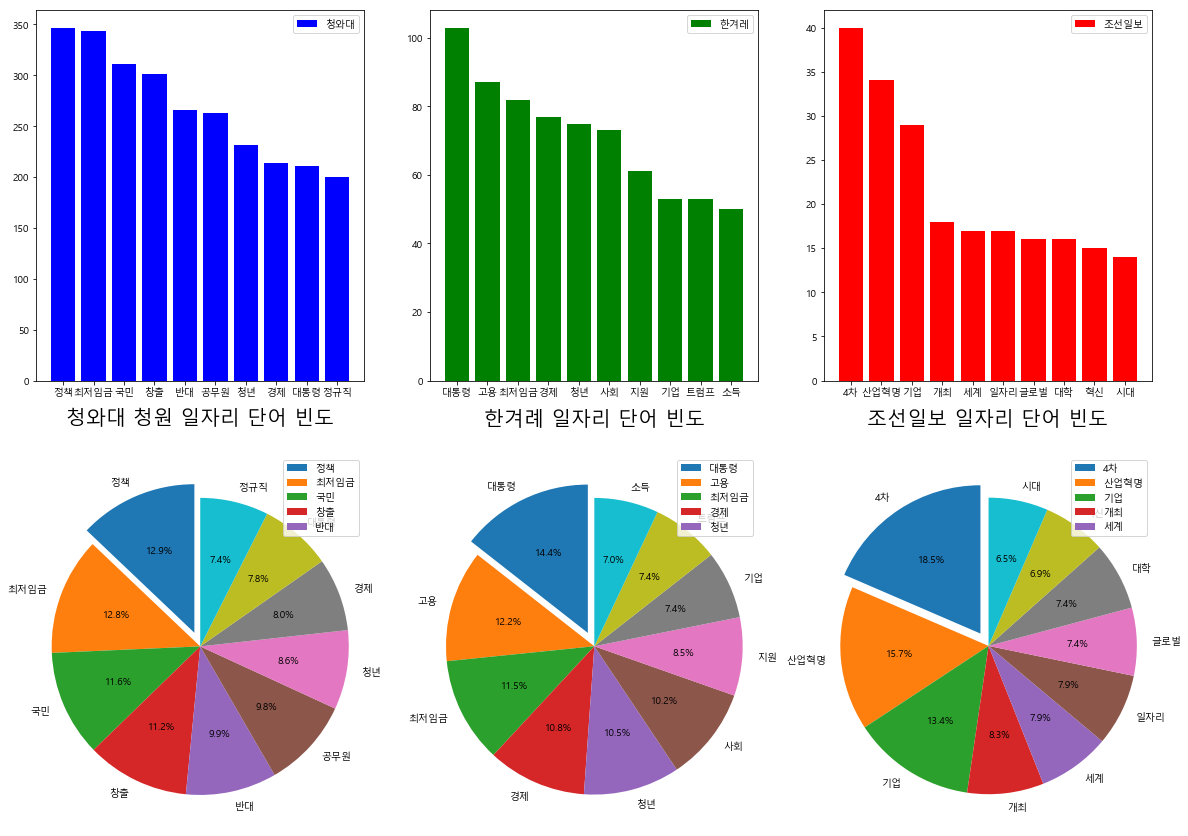

In [29]:
plt.figure(figsize=(20,15))

plt.bar(df_blue_job.index,df_blue_job['빈도'],color='b',label='청와대')
plt.legend()
plt.subplot(232) 
plt.bar(df_han_job.index,df_han_job['빈도'],label = '한겨레',color='g')
plt.legend()
plt.subplot(233) 
plt.bar(df3.index,df3['빈도'],label="조선일보",color = 'r')
plt.legend()
plt.subplot(234)
plt.pie(df_num1,
        explode = explode,
        labels = df_num1.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)

plt.axis('equal')
plt.legend(df_blue_job.index[:5], loc = 1)

plt.title("\n청와대 청원 일자리 단어 빈도\n", fontsize = 20)

plt.subplot(235)
plt.pie(df_num,
        explode = explode,
        labels = df_han_job.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)
plt.axis('equal')
plt.legend(df_han_job.index[:5], loc = 1)
plt.title("\n한겨례 일자리 단어 빈도\n", fontsize = 20)

plt.subplot(236)
plt.pie(df_num3,
        explode = explode,
        labels=df_num3.index, 
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)
plt.axis('equal')
plt.legend(df_num3.index[:5],loc = 1)
plt.title("\n조선일보 일자리 단어 빈도\n", fontsize= 20)

In [138]:
graph = pd.read_csv('./df_job_final.csv')
# graphcho = pd.read_csv('./cho_emp.csv ',encoding = 'EUC-KR')

graph['Date'] = graph['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))
graph

,Unnamed: 0,Title,Date
0,0,[영화감독 마문의 노동일기] 미등록 노동자의 죽음이 던진 질문 / 섹알마문,2018-10-31
1,1,[MODU의 의견] 우리의 소원은 통~일?,2018-10-31
2,2,"문 대통령, 1일 국회서 새해 예산안 시정연설",2018-10-31
3,3,"“통계 부풀릴라, 예산 막아라”…한국당, 정부 ‘일자리 정책’ 저지 예고",2018-10-31
4,4,대한상의·중견기업연합회·중소기업중앙회 ‘동반성장 공동선언문’ 채택,2018-10-31
5,5,도시의 미래를 알아야 부동산 미래가 보인다,2018-10-31
6,6,새만금 비전 ‘기대반 우려반’…“일자리 10만개” “수익성 의문”,2018-10-31
7,7,비정규직 비중 ‘6년만에 최고’…고령층서만 12만여명 늘어,2018-10-30
8,8,피케티의 불평등 해법 “고소득층 세금 인상할 정당 필요하다”,2018-10-30
9,9,"[아침 햇발] 신동빈 회장, ‘을들의 절규’ 안 들리나 / 안재승",2018-10-30


In [124]:
graphcho = pd.read_csv('./final_emp.csv')

del graphcho['Unnamed: 0']
graphcho

,Title,Date
0,"文, 지방 외면 비판에 '예산 지원' 카드 꺼내",2018. 10. 31 (수)
1,회사원부터 노조간부까지… '고용세습 반대' 릴레이 1인 시위,2018. 10. 31 (수)
2,"""軍 대체복무 3개월 남았는데, 회사 없어졌어요""",2018. 10. 31 (수)
3,저탄소 사회 위한 글로벌 에너지 패러다임의 전환을 꿈꾼다,2018. 10. 31 (수)
4,비정규직 비율 6년 만에 최고,2018. 10. 31 (수)
5,"""광주형 일자리 투자 괜찮을까"" 고민하는 현대차",2018. 10. 31 (수)
6,[社說] 정부 대책 발표된 뒤 2000선 붕괴된 증시,2018. 10. 30 (화)
7,[Cover Story] 좋은 '일'이 생긴다,2018. 10. 30 (화)
8,"""취업 못했는데 어딜 나가요"" 서글픈 방구석 청춘 29만",2018. 10. 30 (화)
9,"""단말기 완전 자급제, 법으로 강제하는 나라 없다"" 우려 목소리",2018. 10. 29 (월)


In [125]:
l = graphcho["Date"]
l2 = []
for i in l:
    d = i[:-3].replace(" ", "")
    l2.append(d)
graphcho["날짜2"] = l2

In [131]:
graphcho
# graphcho['날짜2'] = graphcho["날짜2"].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))
# graphcho

,Title,Date,날짜2
0,"文, 지방 외면 비판에 '예산 지원' 카드 꺼내",2018. 10. 31 (수),2018-10-31
1,회사원부터 노조간부까지… '고용세습 반대' 릴레이 1인 시위,2018. 10. 31 (수),2018-10-31
2,"""軍 대체복무 3개월 남았는데, 회사 없어졌어요""",2018. 10. 31 (수),2018-10-31
3,저탄소 사회 위한 글로벌 에너지 패러다임의 전환을 꿈꾼다,2018. 10. 31 (수),2018-10-31
4,비정규직 비율 6년 만에 최고,2018. 10. 31 (수),2018-10-31
5,"""광주형 일자리 투자 괜찮을까"" 고민하는 현대차",2018. 10. 31 (수),2018-10-31
6,[社說] 정부 대책 발표된 뒤 2000선 붕괴된 증시,2018. 10. 30 (화),2018-10-30
7,[Cover Story] 좋은 '일'이 생긴다,2018. 10. 30 (화),2018-10-30
8,"""취업 못했는데 어딜 나가요"" 서글픈 방구석 청춘 29만",2018. 10. 30 (화),2018-10-30
9,"""단말기 완전 자급제, 법으로 강제하는 나라 없다"" 우려 목소리",2018. 10. 29 (월),2018-10-29


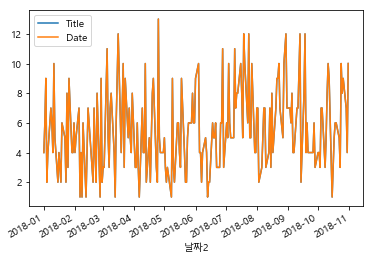

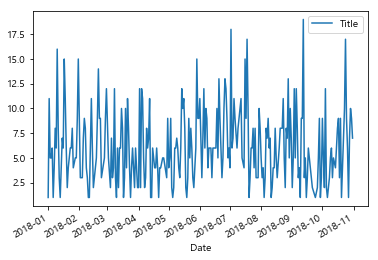

In [135]:
# graphcho2 = graphcho.groupby('날짜2').count()
# graphcho2.plot()
# graph2.plot()

In [43]:
graph['Date'] = pd.to_datetime(graph['Date'])
graph2=graph.groupby('Date').count()
del graph2['Unnamed: 0']

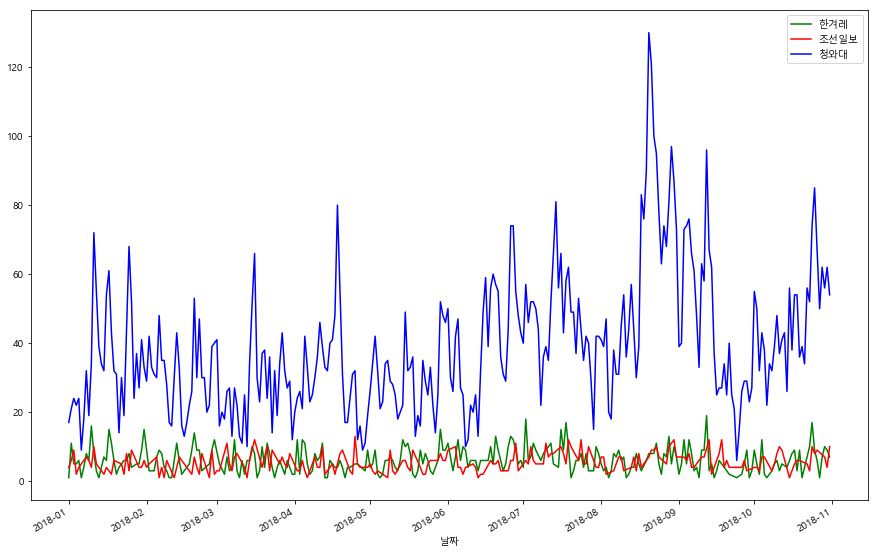

In [181]:
plt.figure(figsize =(15, 10))
graph.groupby("Date").size().plot(color = "g")
graphcho.groupby("날짜2").size().plot(color = "r")
blue.groupby('날짜').size().plot(color = 'b')
plt.legend(("한겨레", "조선일보","청와대"))